In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from collections import Counter

In [21]:
df = pd.read_csv('../Vectores_Caracteristicos_Mariposas.csv')

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [22]:
from collections import Counter

class KNN:
    def __init__(self, vecinos=1):
        self.datos_entrenamiento = []
        self.vecinos = vecinos

    def entrenar(self, X, y):
        for i in range(len(X)):
            punto = X[i]
            etiqueta = y[i]
            self.datos_entrenamiento.append((punto, etiqueta))

    def predecir_punto(self, x):
        distancias_con_etiquetas = []
        
        for punto_entrenamiento, etiqueta_entrenamiento in self.datos_entrenamiento:
            distancia = self.distancia_euclidiana(punto_entrenamiento, x)
            distancias_con_etiquetas.append((distancia, etiqueta_entrenamiento))
        
        distancias_ordenadas = sorted(distancias_con_etiquetas, key=lambda par: par[0])
        
        etiquetas_vecinos_cercanos = []
        for i in range(self.vecinos):
            etiquetas_vecinos_cercanos.append(distancias_ordenadas[i][1])

        contador_etiquetas = Counter(etiquetas_vecinos_cercanos)
        etiqueta_mas_comun = contador_etiquetas.most_common(1)[0][0]
        
        return etiqueta_mas_comun

    def predecir(self, X):
        predicciones = []
        for punto in X:
            predicciones.append(self.predecir_punto(punto))
        return predicciones

    def distancia_euclidiana(self, x1, x2):
        distancia = 0
        for i in range(len(x1)):
            distancia += (x1[i] - x2[i]) ** 2
        return distancia ** 0.5

numero_vecinos = 10

knn = KNN(vecinos=numero_vecinos)
knn.entrenar(X_train, y_train)
y_pred = knn.predecir(X_test)

predicciones_correctas = 0
for i in range(len(y_test)):  
    if y_test[i] == y_pred[i]:  
        predicciones_correctas += 1

precision = predicciones_correctas / len(y_test)  
print(f"Precision: {precision:.2f}")

Precision: 0.27


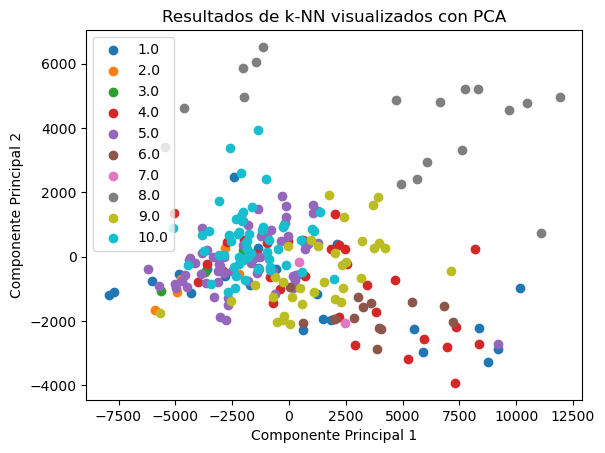

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_test)

for clase in np.unique(y_test):
    ix = np.where(y_pred == clase)
    plt.scatter(X_pca[ix, 0], X_pca[ix, 1], label=clase)

plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()
plt.title('Resultados de k-NN visualizados con PCA')
plt.show()